## Imports

In [1]:
!pip install ipynb}

ERROR: Invalid requirement: 'ipynb}'


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from ipynb.fs.defs.CV_Panorama_v2 import (panoramaMosaic2, show, detectAndDescribe, 
                                          matchKeyPointsBF, drawMatches, getHomography, createMosaic,
                                          warpPerspectiveSimple, image_resize)

## Fotos

In [23]:
src1 = 'foto1A.jpg'
src2 = 'foto1B.jpg'
img1 = cv.imread(src1)
img2 = cv.imread(src2)

In [24]:
two_image_mosaic = True
prints = False
if (two_image_mosaic):
    # If we have a two-image only mosaic, we need to add some side 
    # padding to the base image
    img2p = cv.copyMakeBorder(img2, 0, 0, img1.shape[1], img1.shape[1], cv.BORDER_CONSTANT)

## Blends img1 into img2
# Make a grayscale copy of both images
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2_gray = cv.cvtColor(img2p, cv.COLOR_BGR2GRAY)
print("Grayscale")

Grayscale


In [25]:
kpts_method = 'sift'
n_kpts = 5000

# Detect and Describe Keypoints
keys1, feats1 = detectAndDescribe(img1_gray, kpts_method, n_kpts)
keys2, feats2 = detectAndDescribe(img2_gray, kpts_method, n_kpts)
print("Keypoints")

# Keypoint Matching
matches = matchKeyPointsBF(feats1, feats2, prints)
print("Matches")
if (prints): drawMatches(img1, keys1, img2, keys2, matches)
print("DrawMatches")

Keypoints
Matches
DrawMatches


In [26]:
# Estimate Homography
H, status = getHomography(keys1, keys2, 
                          feats1, feats2, 
                          matches, reprojThresh=4)
print("Homography")

Homography


In [27]:
img2_res = np.zeros((img2p.shape[0], img2p.shape[1], img2p.shape[2]), dtype=np.uint8)
# result = createMosaic(img1, img2_res, H, "average", None, None, prints)
img2h = warpPerspectiveSimple(img1, img2_res, H, "average", prints)

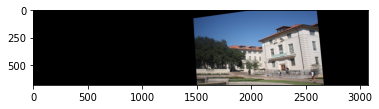

In [160]:
show(img2h)

## Máscara Distância

In [21]:
teste = np.ones((9,16))
teste

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [11]:
def distMask(img):
    """
    Computes pixel distance to borders and 
    creates a mask with this information
    
    Parameters:
        img: image to be processed
    Return:
        result: mask
    """
    result = np.zeros(img.shape)
    
    maxRow = img.shape[0]
    maxCol = img.shape[1]
    for i in range(maxRow):
        for j in range(maxCol):
            # Vertical Distance
            distTop = i
            distBot = (maxRow-1) - i
            distRow = min(distTop, distBot)
            
            # Horizontal Distance
            distLft = j
            distRgt = (maxCol-1) - j
            distCol = min(distLft, distRgt)
            
            # Total Distance
            dist = min(distRow, distCol)
            result[i][j] = dist + 1   # So we don't have zeros
    cv.normalize(result, result, 1, 255, cv.NORM_MINMAX)
    result = result / 255
    # result = np.uint8(result)
    return result

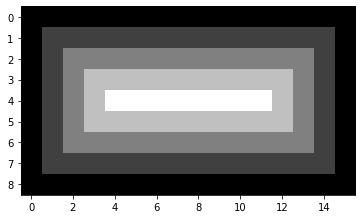

In [99]:
result = distMask(teste)
plt.imshow(result, cmap='gray')

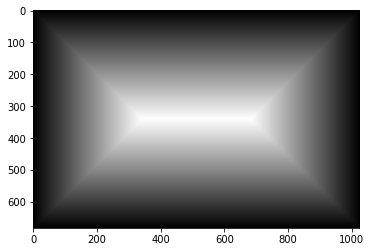

In [101]:
result1 = distMask(img1)
show(np.uint8(result1*255))

In [102]:
np.max(result1)

1.0

In [103]:
np.min(result1)

0.00392156862745098

## Questão dos Pesos

In [104]:
teste169 = np.ones((9,16))
mask169 = distMask(teste169)

In [105]:
res1 = cv.addWeighted(teste169,0.5,teste169,0.5,0)
res1

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [106]:
res2 = teste169 * mask169
res2

array([[0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.25294118, 0.25294118, 0.25294118, 0.25294118,
        0.25294118, 0.25294118, 0.25294118, 0.25294118, 0.25294118,
        0.25294118, 0.25294118, 0.25294118, 0.25294118, 0.25294118,
        0.00392157],
       [0.00392157, 0.25294118, 0.50196078, 0.50196078, 0.50196078,
        0.50196078, 0.50196078, 0.50196078, 0.50196078, 0.50196078,
        0.50196078, 0.50196078, 0.50196078, 0.50196078, 0.25294118,
        0.00392157],
       [0.00392157, 0.25294118, 0.50196078, 0.75098039, 0.75098039,
        0.75098039, 0.75098039, 0.75098039, 0.75098039, 0.75098039,
        0.75098039, 0.75098039, 0.75098039, 0.50196078, 0.25294118,
        0.00392157],
       [0.00392157, 0.25294118, 0.50196078, 0.75098039, 1.        ,
        1.        , 1.        , 

In [107]:
res3 = res2 // mask169
res3

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [108]:
res35 = (teste169 * mask169) + (teste169 * mask169)
res35

array([[0.00784314, 0.00784314, 0.00784314, 0.00784314, 0.00784314,
        0.00784314, 0.00784314, 0.00784314, 0.00784314, 0.00784314,
        0.00784314, 0.00784314, 0.00784314, 0.00784314, 0.00784314,
        0.00784314],
       [0.00784314, 0.50588235, 0.50588235, 0.50588235, 0.50588235,
        0.50588235, 0.50588235, 0.50588235, 0.50588235, 0.50588235,
        0.50588235, 0.50588235, 0.50588235, 0.50588235, 0.50588235,
        0.00784314],
       [0.00784314, 0.50588235, 1.00392157, 1.00392157, 1.00392157,
        1.00392157, 1.00392157, 1.00392157, 1.00392157, 1.00392157,
        1.00392157, 1.00392157, 1.00392157, 1.00392157, 0.50588235,
        0.00784314],
       [0.00784314, 0.50588235, 1.00392157, 1.50196078, 1.50196078,
        1.50196078, 1.50196078, 1.50196078, 1.50196078, 1.50196078,
        1.50196078, 1.50196078, 1.50196078, 1.00392157, 0.50588235,
        0.00784314],
       [0.00784314, 0.50588235, 1.00392157, 1.50196078, 2.        ,
        2.        , 2.        , 

In [109]:
res36 = (mask169 + mask169)
res36

array([[0.00784314, 0.00784314, 0.00784314, 0.00784314, 0.00784314,
        0.00784314, 0.00784314, 0.00784314, 0.00784314, 0.00784314,
        0.00784314, 0.00784314, 0.00784314, 0.00784314, 0.00784314,
        0.00784314],
       [0.00784314, 0.50588235, 0.50588235, 0.50588235, 0.50588235,
        0.50588235, 0.50588235, 0.50588235, 0.50588235, 0.50588235,
        0.50588235, 0.50588235, 0.50588235, 0.50588235, 0.50588235,
        0.00784314],
       [0.00784314, 0.50588235, 1.00392157, 1.00392157, 1.00392157,
        1.00392157, 1.00392157, 1.00392157, 1.00392157, 1.00392157,
        1.00392157, 1.00392157, 1.00392157, 1.00392157, 0.50588235,
        0.00784314],
       [0.00784314, 0.50588235, 1.00392157, 1.50196078, 1.50196078,
        1.50196078, 1.50196078, 1.50196078, 1.50196078, 1.50196078,
        1.50196078, 1.50196078, 1.50196078, 1.00392157, 0.50588235,
        0.00784314],
       [0.00784314, 0.50588235, 1.00392157, 1.50196078, 2.        ,
        2.        , 2.        , 

In [110]:
res4 = ((teste169 * mask169) + (teste169 * mask169))/(mask169 + mask169)
res4

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

## Máscaras Flipadas

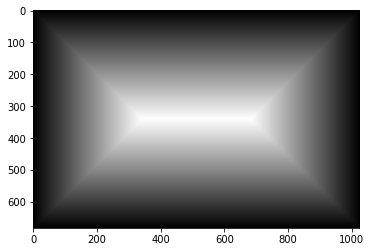

In [111]:
mask_img1_nn = distMask(img1)
show(np.uint8(mask_img1_nn*255))

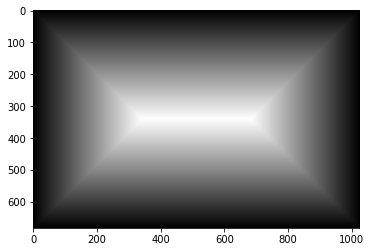

In [115]:
mask_img2_nn = distMask(img2)
show(np.uint8(mask_img2_nn*255))

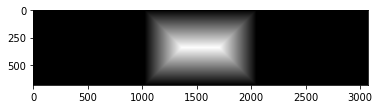

In [117]:
mask_img2_pn = cv.copyMakeBorder(mask_img2_nn, 0, 0, img1.shape[1], img1.shape[1], cv.BORDER_CONSTANT)
show(np.uint8(mask_img2_pn*255))

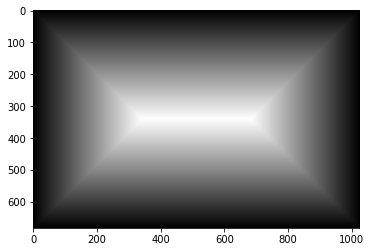

In [128]:
mask_img1_nn_uint8 = np.uint8(mask_img1_nn*255)
show(mask_img1_nn_uint8)

In [147]:
img2_res = np.zeros((img2p.shape[0], img2p.shape[1], img2p.shape[2]), dtype=np.uint8)
# result = createMosaic(img1, img2_res, H, "average", None, None, prints)
result = warpPerspectiveSimple(mask_img1_nn_uint8, img2_res, H, "average", prints)

In [148]:
np.max(result)

255

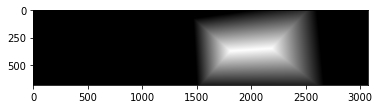

In [149]:
show(result)

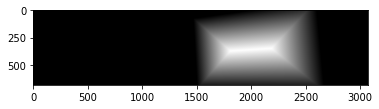

In [150]:
mask_img2_nh = result/255
plt.imshow(mask_img2_nh)

## Somando com Máscara

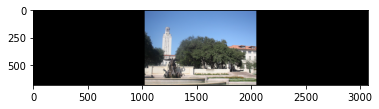

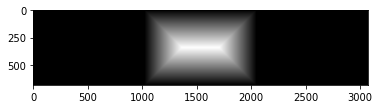

In [165]:
show(img2p)
plt.imshow(mask_img2_pn)

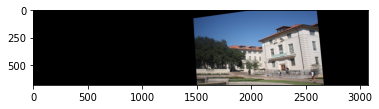

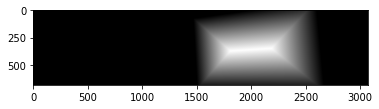

In [169]:
show(img2h)
plt.imshow(mask_img2_nh)

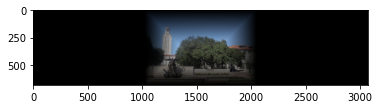

In [173]:
num = img2p*mask_img2_pn
show(np.uint8(num))

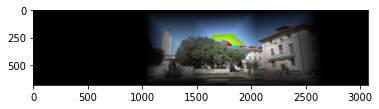

In [174]:
num = img2p*mask_img2_pn + img2h*mask_img2_nh
show(np.uint8(num))

In [176]:
den = mask_img2_pn + mask_img2_nh

In [181]:
res_f = np.divide(num, den, where=(den!=0))

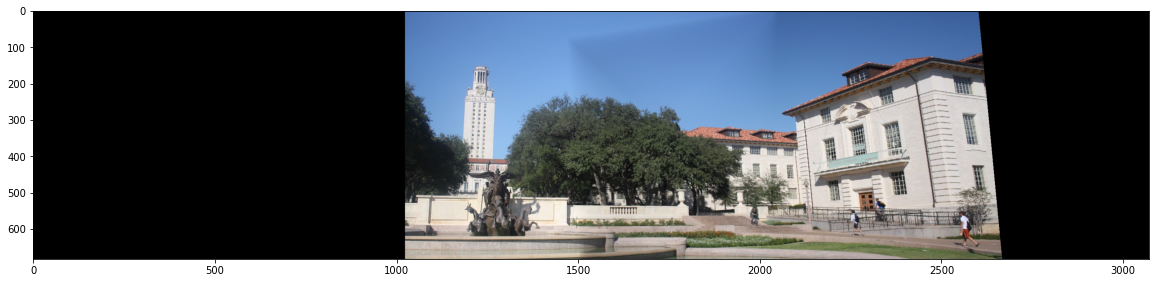

In [184]:
plt.figure(figsize=(20,10))
show(np.uint8(res_f))

## Funções

In [28]:
src1 = 'foto1A.jpg'
src2 = 'foto1B.jpg'
other_img_unflipped = cv.imread(src1)
base_img_unpadded = cv.imread(src2)

In [19]:
def distMasks(base_img_unpadded, other_img_unflipped, H):
    """
    Creates distance-to-border-based masks for both images, given also the homography matrix
    
    Parameters:
        base_img_unpadded: base image (not to be transformed) without padding
        other_img_unflipped: image to be transformed, not yet transformed
        H: homograpy matrix
    Returns:
        m_base_padded: mask for base image, already padded
        m_other_flipped: mask for other image, already transformed
    """
    ## Can only be applied to two image mosaics
    # Mask for base image, without padding: floats from 0 to 1
    m_base_normal = distMask(base_img_unpadded)    
    
    # Mask for to-be-transformed image, in yet to be transformed state
    # floats from 0 to 1
    m_other_normal = distMask(other_img_unflipped)   

    # Mask padding
    width = other_img_unflipped.shape[1]
    m_base_padded = cv.copyMakeBorder(m_base_normal, 0, 0, width, width, cv.BORDER_CONSTANT)
    
    # Mask transformation via homography
    # Converts to uint8 to be able to transform
    m_other_normal_uint8 = np.uint8(m_other_normal*255)
    blank_canvas = np.zeros((m_base_padded.shape[0], m_base_padded.shape[1], base_img_unpadded.shape[2]), dtype=np.uint8)
    result = warpPerspectiveSimple(m_other_normal_uint8, blank_canvas, H, "average", prints)
    m_other_flipped = result/255
    return m_base_padded, m_other_flipped

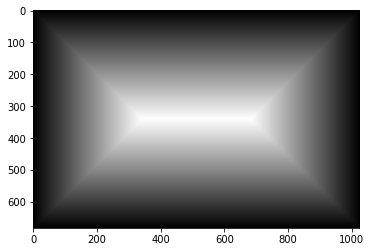

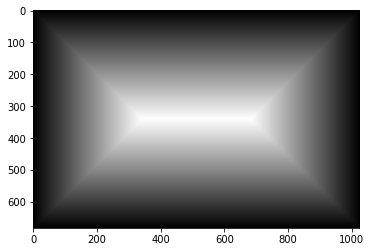

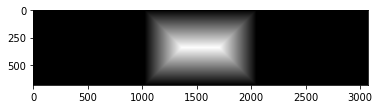

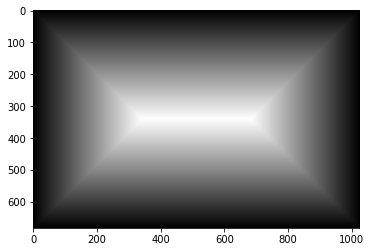

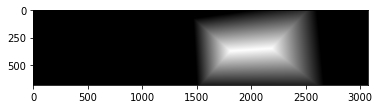

In [18]:
m1, m2 = distMasks(base_img_unpadded, other_img_unflipped, H)

In [20]:
def sumWithMasks(base_img_padded, mask_base_padded, other_img_flipped, mask_other_flipped):
    """
    Blends two images by weighting them by their correspondent masks
    
    Parameters:
        base_img_padded: base image, already padded
        mask_base_padded: mask for base image, already padded
        other_img_flipped: to-be-transformed image, already transformed
        mask_other_flipped: mask for to-be-transformed image
    Returns:
        res_int: result blended image
    """
    
    num = base_img_padded*mask_base_padded + other_img_flipped*mask_other_flipped
    den = mask_base_padded + mask_other_flipped
    res_f = np.divide(num, den, where=(den!=0))
    res_int = np.uint8(res_f)
    return res_int

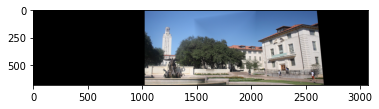

In [29]:
res = sumWithMasks(img2p, m1, img2h, m2)
show(res)

## Funções para 3

In [31]:
src1 = 'img1-set1.jpg'
src2 = 'img2-set1.jpg'
src3 = 'img3-set1.jpg'

img1 = cv.imread(src1)
img2 = cv.imread(src2)
img3 = cv.imread(src3)

img1 = image_resize(img1, height=500)
img2 = image_resize(img2, height=500)
img3 = image_resize(img3, height=500)

In [51]:
def panoramaMosaic3Special(img1, img2, img3, maxHeight=500, kpts_method='sift',n_kpts=5000, prints=False):
    """
    Blends three images into a panorama mosaic
    
    Parameters:
        img1: left image
        img2: center image
        img2: right image
        maxHeight: maximum height. If images are bigger, they will be resized
        kpts_method: keypoint description method. 
                     Either 'sift' or 'brief'. Defaults to 'sift'
        n_kpts: maximum quantity of keypoints per image
        prints: prints some progress information if true. Defaults to false.
        
    Returns:
        res: panorama image blending the images
    """
    # Resize images if they are too large
    if (img1.shape[0] > maxHeight):
        img1 = image_resize(img1, height=maxHeight)
        img2 = image_resize(img2, height=maxHeight)
        img3 = image_resize(img3, height=maxHeight)

    # Padding center-image so we can form the mosaic 
    img2_pad = cv.copyMakeBorder(img2, 0, 0, img1.shape[1], img3.shape[1], cv.BORDER_CONSTANT)

    # Make a grayscale copy of images
    img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    img2_gray = cv.cvtColor(img2_pad, cv.COLOR_BGR2GRAY)
    img3_gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
    print("Grayscale")

    # Detect and Describe Keypoints
    keys1, feats1 = detectAndDescribe(img1_gray, kpts_method, n_kpts)
    keys2, feats2 = detectAndDescribe(img2_gray, kpts_method, n_kpts)
    keys3, feats3 = detectAndDescribe(img3_gray, kpts_method, n_kpts)
    print("Keypoints")

    # Keypoint Matching
    matches12 = matchKeyPointsBF(feats1, feats2, prints)
    matches32 = matchKeyPointsBF(feats3, feats2, prints)
    print("Matches")

    if (prints): drawMatches(img1, keys1, img2, keys2, matches)
    if (prints): drawMatches(img3, keys3, img2, keys2, matches)
    print("DrawMatches")

    # Estimate Homography
    H12, status12 = getHomography(keys1, keys2, 
                                  feats1, feats2, 
                                  matches12, reprojThresh=4)
    H32, status32 = getHomography(keys3, keys2, 
                                  feats3, feats2, 
                                  matches32, reprojThresh=4)
    print("Homography")

    # Appliying homography onto blank canvas
    blank_canvas = np.zeros((img2_pad.shape[0], img2_pad.shape[1], img2_pad.shape[2]), dtype=np.uint8)
    img1_flip = warpPerspectiveSimple(img1, blank_canvas, H12, "average", prints)
    print("Transform img1")
    blank_canvas = np.zeros((img2_pad.shape[0], img2_pad.shape[1], img2_pad.shape[2]), dtype=np.uint8)
    img3_flip = warpPerspectiveSimple(img3, blank_canvas, H32, "average", prints)
    print("Transform img3")
    
    # Masks to help blending
    m_img2_pad, m_img1_flp = distMasks(img2, img1, H12)
    print("Masks 12")
    m_img2_pad, m_img3_flp = distMasks(img3, img1, H32)
    print("Masks 32")
    
    # Feathering
    res = sumWithMasks3(img2_pad, m_img2_pad, img1_flip, m_img1_flp, img3_flip, m_img3_flp)
    print("Mosaic")
    if (prints):
        plt.figure(figsize=(20,10))
        show(res)
    return res

In [33]:
m_img2_pad, m_img1_flp = distMasks(img2, img1, H12)
print("Masks 12")
m_img2_pad, m_img3_flp = distMasks(img3, img1, H32)
print("Masks 32")

In [34]:
def sumWithMasks3(center_img_padded, mask_center_padded, 
                  left_img_flipped, mask_left_flipped,
                  right_img_flipped, mask_right_flipped):
    """
    Blends three images by weighting them by their correspondent masks
    
    Parameters:
        center_img_padded: center image, base to the mosaic, 
                           won't be transformed, already padded.
        mask_center_padded: 
    Returns:
        res_int: result blended image
    """
    
    num = (center_img_padded*mask_center_padded + 
           left_img_flipped*mask_left_flipped +
           right_img_flipped*mask_right_flipped)
    den = mask_center_padded + mask_left_flipped + mask_right_flipped
    res_f = np.divide(num, den, where=(den!=0))
    res_int = np.uint8(res_f)
    return res_int

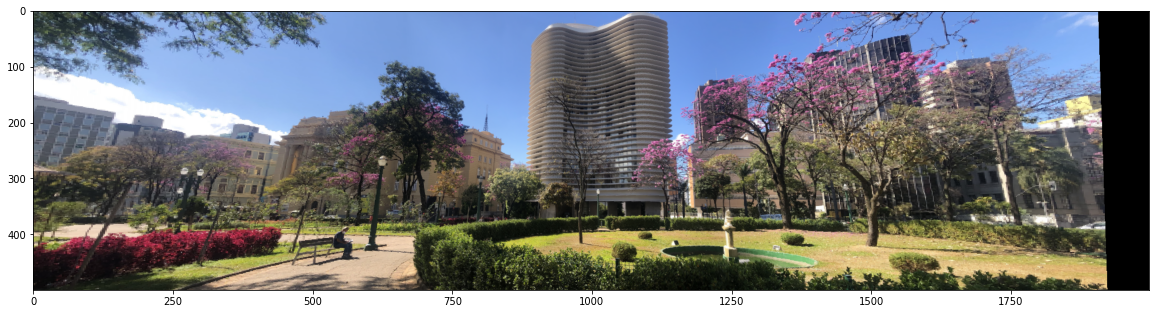

In [49]:
res = sumWithMasks3(img2_pad, m_img2_pad, img1_flip, m_img1_flp, img3_flip, m_img3_flp)
plt.figure(figsize=(20,10))
show(res)

In [ ]:
res1 = cv.addWeighted(img2_pad, 1.0, )

## Funções para 2

In [52]:
def sumWithMasks2(base_img_padded, mask_base_padded, other_img_flipped, mask_other_flipped):
    """
    Blends two images by weighting them by their correspondent masks
    
    Parameters:
        base_img_padded: base image, already padded
        mask_base_padded: mask for base image, already padded
        other_img_flipped: to-be-transformed image, already transformed
        mask_other_flipped: mask for to-be-transformed image
    Returns:
        res_int: result blended image
    """
    
    num = base_img_padded*mask_base_padded + other_img_flipped*mask_other_flipped
    den = mask_base_padded + mask_other_flipped
    res_f = np.divide(num, den, where=(den!=0))
    res_int = np.uint8(res_f)
    return res_int

In [53]:
def panoramaMosaic2Special(img1, img2, maxHeight=500, kpts_method='sift',n_kpts=5000, prints=False):
    """
    Blends two images into a panorama mosaic
    
    Parameters:
        img1: to-be-transformed image
        img2: base image
        maxHeight: maximum height. If images are bigger, they will be resized
        kpts_method: keypoint description method. 
                     Either 'sift' or 'brief'. Defaults to 'sift'
        n_kpts: maximum quantity of keypoints per image
        prints: prints some progress information if true. Defaults to false.
        
    Returns:
        res: panorama image blending the images
    """
    # Resize images if they are too large
    if (img1.shape[0] > maxHeight):
        img1 = image_resize(img1, height=maxHeight)
        img2 = image_resize(img2, height=maxHeight)

    # Padding base-image so we can form the mosaic 
    img2_pad = cv.copyMakeBorder(img2, 0, 0, img1.shape[1], img1.shape[1], cv.BORDER_CONSTANT)

    # Make a grayscale copy of images
    img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    img2_gray = cv.cvtColor(img2_pad, cv.COLOR_BGR2GRAY)
    print("Grayscale")

    # Detect and Describe Keypoints
    keys1, feats1 = detectAndDescribe(img1_gray, kpts_method, n_kpts)
    keys2, feats2 = detectAndDescribe(img2_gray, kpts_method, n_kpts)
    print("Keypoints")

    # Keypoint Matching
    matches12 = matchKeyPointsBF(feats1, feats2, prints)
    print("Matches")
    if (prints): drawMatches(img1, keys1, img2, keys2, matches)
    print("DrawMatches")

    # Estimate Homography
    H12, status12 = getHomography(keys1, keys2, 
                                  feats1, feats2, 
                                  matches12, reprojThresh=4)
    print("Homography")

    # Appliying homography onto blank canvas
    blank_canvas = np.zeros((img2_pad.shape[0], img2_pad.shape[1], img2_pad.shape[2]), dtype=np.uint8)
    img1_flip = warpPerspectiveSimple(img1, blank_canvas, H12, "average", prints)
    print("Transform img1")
    
    # Masks to help blending
    m_img2_pad, m_img1_flp = distMasks(img2, img1, H12)
    print("Masks 12")
    
    # Feathering
    res = sumWithMasks2(img2_pad, m_img2_pad, img1_flip, m_img1_flp)
    print("Mosaic")
    if (prints):
        plt.figure(figsize=(20,10))
        show(res)
    return res

In [54]:
src1 = 'foto1A.jpg'
src2 = 'foto1B.jpg'
img1 = cv.imread(src1)
img2 = cv.imread(src2)

Grayscale
Keypoints
Matches
DrawMatches
Homography
Transform img1
Masks 12
Mosaic


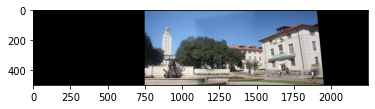

In [55]:
res2 = panoramaMosaic2Special(img1, img2)
show(res2)

Grayscale
Keypoints
Matches
DrawMatches
Homography
Transform img1
Masks 12
Mosaic


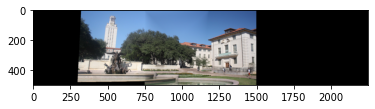

In [56]:
res2 = panoramaMosaic2Special(img2, img1)
show(res2)